In [1]:
#import packages
import pandas as pd
import os
import math
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

def cosinesim(text1, text2, vectorizer):
    sparse_matrix = vectorizer.fit_transform([text1])
    doc_term_matrix = sparse_matrix.toarray()

    tgt_transform = vectorizer.transform([text2]).toarray()
    
    tgt_cosine = cosine_similarity(doc_term_matrix,tgt_transform)
    return tgt_cosine[0][0]

In [3]:
import re
#create lists
limedf = pd.read_csv(os.path.join('mediabiaswithlime.tsv'), sep='\t', header=0)
shapdf = pd.read_csv(os.path.join('mediabiaswithshap.tsv'), sep='\t', header=0)
getorig = pd.read_csv(os.path.join('MBICcleaned.tsv'), sep='\t', header=0)

limevals = limedf['lime'].tolist()    
newlime = []
for line in limevals:
    #print(line)
    linestring = re.sub(r'[^a-zA-Z ]+', '', line)    
    newlime.append(linestring)
strings = limedf['text'].tolist()

shapvals = shapdf['shap'].tolist()
newshap = []
for line in shapvals:
    linestring = re.sub(r'[^a-zA-Z ]+', '', line)    
    newshap.append(linestring)
origlist = getorig['biased_words4'].tolist()
neworig = []
for line in origlist:
    #print(line)
    linestring = re.sub(r'[^a-zA-Z ]+', '', line)
    #print(linestring)
    neworig.append(linestring)
vectorizer = CountVectorizer()
a = vectorizer.fit_transform(origlist)

In [4]:
print(strings[0], '\n', newlime[0],'\n' ,neworig[0], limevals[0], cosinesim(neworig[0], newlime[0], vectorizer),newshap[0], shapvals[0], cosinesim(neworig[0], newshap[0], vectorizer),  '\n')

print(strings[234], '\n', newlime[234],'\n' ,neworig[234], cosinesim(neworig[234], newlime[234], vectorizer), newshap[234], cosinesim(neworig[234], newshap[234], vectorizer),  '\n')
print(strings[158], '\n', newlime[158],'\n' ,neworig[158], cosinesim(neworig[158], newlime[158], vectorizer),newshap[158], cosinesim(neworig[158], newshap[158], vectorizer),  '\n')

YouTube is making clear there will be no “birtherism” on its platform during this year’s U.S. presidential election – a belated response to a type of conspiracy theory more prevalent in the 2012 race. 
 will  theory  this  year    there  
 belated birtherism [('will', -0.029252683519967963), ('theory', -0.022364252186906533), ('this', 0.019847166952076212), ('year', 0.015530691642299794), ('2012', 0.014233816452807494), ('there', 0.011122930501996121)] 0.0 theory    years  a  type  of  [('theory', 0.05429564897039397), ('2012', 0.012586184116931602), ('year’s', 0.008249086201644829), ('a', 0.0), ('type', -0.0026079764847514275), ('of', -0.012050332357414423)] 0.0 

John Coughlin’s burgeoning career was recently shrouded in controversy after the U.S. Center for SafeSport placed a temporary restriction on his eligibility to be involved figure skating on Dec. 17, USA Today first reported.  
 after    John  was  be  his  
 unpopular lie through his teeth highly 0.4082482904638631 John  shr

In [5]:
cosinesimslime = []
for (lime, orig) in zip(newlime, neworig):
    cosinesimslime.append(cosinesim(lime, orig, vectorizer))

cosinesum = sum(cosinesimslime)/len(cosinesimslime)
print(cosinesum)
print(cosinesimslime.index(max(cosinesimslime)))


0.002021228228340178
234


In [6]:
cosinesimsshap = []

for (shap, orig) in zip(newshap, neworig):
    cosinesimsshap.append(cosinesim(shap, orig, vectorizer))

cosinesums = sum(cosinesimsshap)/len(cosinesimsshap)
print(cosinesums)
print(cosinesimsshap.index(max(cosinesimsshap)))

0.004352076545337145
158


In [7]:
cosinesimsb = []

for (shap, orig) in zip(newshap, newlime):
    cosinesimsb.append(cosinesim(shap, orig, vectorizer))

cosinesumsb = sum(cosinesimsb)/len(cosinesimsb)
print(cosinesumsb)

0.3755144431346729


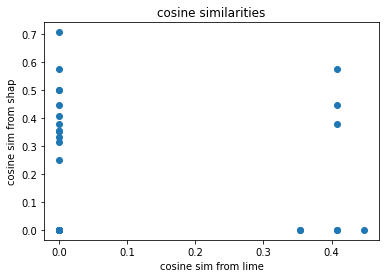

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(cosinesimslime, cosinesimsshap)
plt.xlabel("cosine sim from lime")
plt.ylabel("cosine sim from shap")
plt.title("cosine similarities")
plt.show()

In [9]:
origlisttokens = []
limelisttokens = []
shaplisttokens = []
for string in neworig:
    for token in string.split(" "):
        origlisttokens.append(token)
for string in newlime:
    for token in string.split(" "):
        limelisttokens.append(token)
for string in newshap:    
    for token in string.split(" "):
        shaplisttokens.append(token)

In [10]:
#print(origlisttokens[0])
from collections import Counter
origcount = Counter(origlisttokens)
origcounter = sorted(origcount.items(), key=lambda item: item[1], reverse=True)
limecount = Counter(limelisttokens)
limecounter =sorted(limecount.items(), key=lambda item: item[1], reverse=True)
shapcount = Counter(shaplisttokens)
shapcounter =sorted(shapcount.items(), key=lambda item: item[1], reverse=True)
print('origcounter:')
count = 0
for letter in origcounter:
    print(letter, origcounter[1])
    count+=1
    if count > 10:
        break
print('limecounter:')
for letter in limecounter:
    print(letter, limecounter[1])
    count+=1
    if count >20:
        break
        
print('shapcounter:')
for letter in shapcounter:
    print(letter, shapcounter[1])
    count+=1
    if count >= 30:
        break


origcounter:
('', 332) ('white', 28)
('white', 28) ('white', 28)
('of', 18) ('white', 28)
('radical', 14) ('white', 28)
('massive', 13) ('white', 28)
('prolife', 11) ('white', 28)
('slammed', 11) ('white', 28)
('false', 11) ('white', 28)
('threatened', 11) ('white', 28)
('dangerous', 11) ('white', 28)
('illegal', 11) ('white', 28)
limecounter:
('', 9536) ('of', 281)
('of', 281) ('of', 281)
('and', 264) ('of', 281)
('has', 235) ('of', 281)
('to', 198) ('of', 281)
('in', 166) ('of', 281)
('the', 158) ('of', 281)
('after', 99) ('of', 281)
('people', 88) ('of', 281)
('at', 87) ('of', 281)
shapcounter:
('', 9566) ('the', 418)
('the', 418) ('the', 418)
('to', 266) ('the', 418)
('of', 233) ('the', 418)
('The', 214) ('the', 418)
('a', 185) ('the', 418)
('and', 184) ('the', 418)
('in', 138) ('the', 418)
('that', 117) ('the', 418)
